# Titanic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file1 = pd.read_csv('https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Titanic/titanic_data.csv')

In [7]:
file1.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
file1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Numerical Analysis

In [8]:
file1.select_dtypes(include = ['number']).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

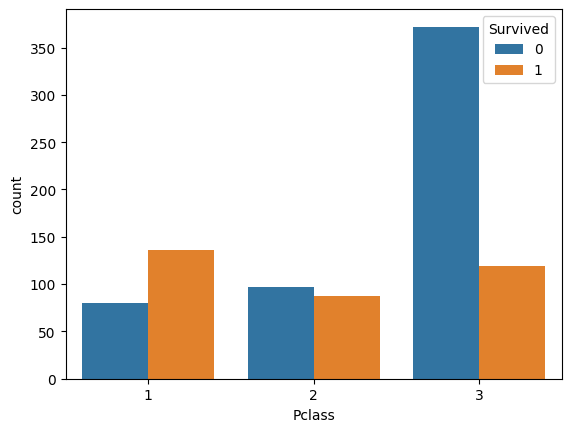

In [9]:
sns.countplot(x = 'Pclass', data = file1, hue = 'Survived')
plt.show()

In [12]:
file1.groupby('Survived')['Pclass'].value_counts(normalize=True)

Survived  Pclass
0         3         0.677596
          2         0.176685
          1         0.145719
1         1         0.397661
          3         0.347953
          2         0.254386
Name: proportion, dtype: float64

In [14]:
file1.groupby('Survived')['SibSp'].value_counts()

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        210
          1        112
          2         13
          3          4
          4          3
Name: count, dtype: int64

In [15]:
file1['isChildren'] = np.where(file1['Age'] < 15, 1, 0)

In [16]:
file1['isChildren']

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: isChildren, Length: 891, dtype: int64

In [17]:
file1['isChildren'].value_counts()

isChildren
0    813
1     78
Name: count, dtype: int64

In [19]:
file1.groupby('isChildren')['Survived'].value_counts()

isChildren  Survived
0           0           516
            1           297
1           1            45
            0            33
Name: count, dtype: int64

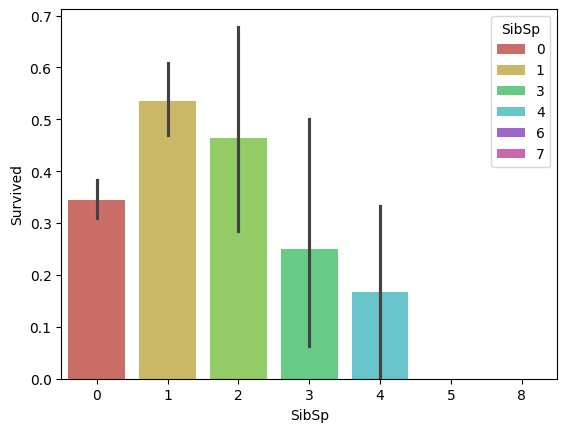

In [54]:
sns.barplot(x = 'SibSp', y = 'Survived', data = file1, estimator='mean', hue = 'SibSp', palette='hls')
plt.show()

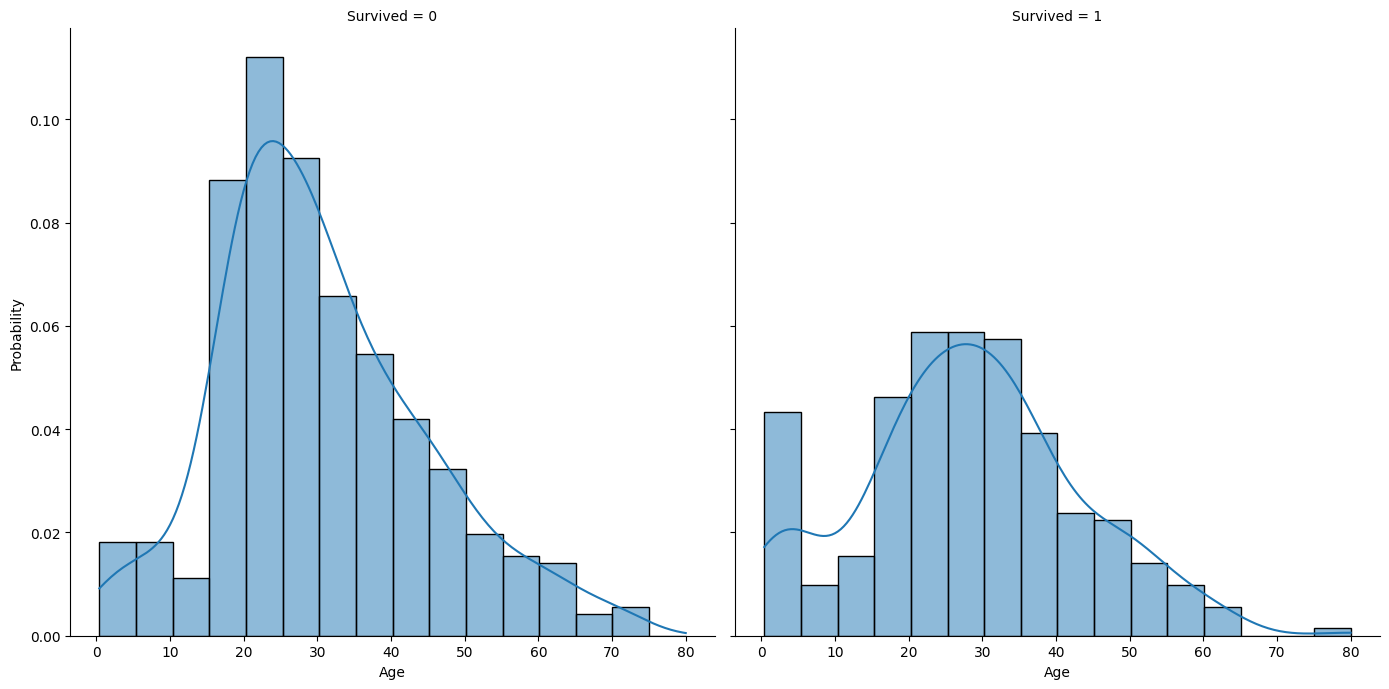

In [98]:
sns.displot(x = 'Age', data = file1, kde = True, stat = 'probability', col = 'Survived', height=7, bins = 16)
plt.show()

In [73]:
file1['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
30.00    25
19.00    25
         ..
66.00     1
0.92      1
23.50     1
53.00     1
80.00     1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

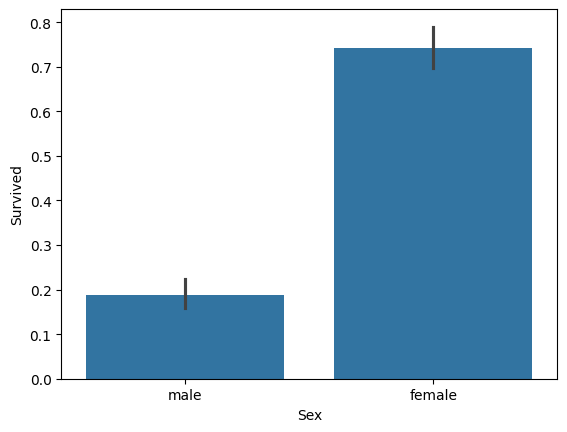

In [93]:
sns.barplot(x = 'Sex', y = 'Survived', data = file1)